<a href="https://colab.research.google.com/github/ArtyomShabunin/SMOPA/blob/main/lesson_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://prana-system.com/files/110/rds_color_full.png" alt="tot image" width="300"  align="center"/> &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
<img src="https://mpei.ru/AboutUniverse/OficialInfo/Attributes/PublishingImages/logo1.jpg" alt="mpei image" width="200" align="center"/>
<img src="https://mpei.ru/Structure/Universe/tanpe/structure/tfhe/PublishingImages/tot.png" alt="tot image" width="100"  align="center"/>

---

# **Системы машинного обучения и предиктивной аналитики в тепловой и возобновляемой энергетике**  

# ***Практические занятия***


---

# Занятие №10
# XGBoost
**23 апреля 2025г.**

XGBoost (Extreme Gradient Boosting) — это мощная и эффективная библиотека машинного обучения, основанная на методе **градиентного бустинга**. Она используется для решения задач классификации, регрессии и ранжирования.  

### Основные особенности XGBoost:
- **Градиентный бустинг** — это метод ансамблирования, при котором несколько слабых моделей (обычно деревьев решений) объединяются для формирования сильной модели.
- **Эффективность** — XGBoost оптимизирован по скорости и использует продвинутые техники, такие как параллельные вычисления и буферизацию деревьев.
- **Поддержка регуляризации** — встроенная L1 и L2 регуляризация помогает предотвращать переобучение.
- **Обработка пропущенных значений** — библиотека умеет сама "угадывать", куда направить пропущенные значения при обучении деревьев.
- **Гибкость** — поддерживает различные типы задач, множество гиперпараметров, и может работать как с небольшими, так и с очень большими наборами данных.

### Где используется:
- Соревнования по машинному обучению (например, Kaggle)
- Финансовый анализ
- Диагностика в медицине
- Предиктивное обслуживание оборудования
- Маркетинговая аналитика

In [ ]:
import numpy as np
import pandas as pd

from sklearn import preprocessing
from sklearn.model_selection import cross_val_predict, StratifiedKFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, ConfusionMatrixDisplay
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt

import ipywidgets as widgets
from IPython.display import display, clear_output

from tqdm import tqdm

## Многоклассовая классификация с XGBoost
### Загрузка и предобработка данных

In [ ]:
import gdown
import warnings
warnings.filterwarnings('ignore')
gdown.download('https://drive.google.com/uc?id=1j54o4pHTm3HvaYTEtv_i4hOJGy5yNeZZ', verify=False)

data = pd.read_parquet("./data_modes.gzip")

Downloading...
From (original): https://drive.google.com/uc?id=1j54o4pHTm3HvaYTEtv_i4hOJGy5yNeZZ
From (redirected): https://drive.google.com/uc?id=1j54o4pHTm3HvaYTEtv_i4hOJGy5yNeZZ&confirm=t&uuid=3db5d48c-6a2d-45a3-9e3f-a55351f982ea
To: /content/data_modes.gzip
100%|██████████| 173M/173M [00:04<00:00, 35.7MB/s]


In [ ]:
data.head()

,GTA1.DBinPU.Aldi,GTA1.DBinPU.Alvna,GTA1.DBinPU.Alzzo,GTA1.DBinPU.Bo,GTA1.DBinPU.DlPkf,GTA1.DBinPU.DlPtgft,GTA1.DBinPU.DlPvf,GTA1.DBinPU.fi,GTA1.DBinPU.hmGTD,GTA1.DBinPU.hmTG,...,heated_air,zzo_is_open,full_power_mode,partial_power_mode,increas_power_mode,decreas_power_mode,start_up_mode,shutdown_mode,stopped_state_mode,air_heating_mode
2023-02-26 06:59:50,225.550000,-4.398000,-0.082000,101.044,113.088000,33.709000,0.200000,56.615000,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:00,225.610769,-4.327115,-0.089769,101.044,113.151231,33.709000,0.200000,56.615000,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:10,225.436897,-4.363724,-0.091000,101.044,113.039759,33.633586,0.200207,56.516103,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:20,225.710833,-4.306625,-0.093000,101.044,113.053458,33.506500,0.200750,56.376000,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False
2023-02-26 07:00:30,226.355000,-4.183118,-0.091500,101.044,113.730941,33.818529,0.200000,56.199353,442.64,444.536,...,False,False,True,False,False,False,False,False,False,False


Признаки

In [ ]:
use_columns = ['GTA1.DBinPU.Alzzo', 'GTA1.DBinPU.Bo', 'GTA1.DBinPU.DlPkf',
               'GTA1.DBinPU.DlPtgft', 'GTA1.DBinPU.DlPvf', 'GTA1.DBinPU.fi',
               'GTA1.DBinPU.hmGTD', 'GTA1.DBinPU.hmTG', 'GTA1.DBinPU.P1mvhTG',
               'GTA1.DBinPU.Pk', 'GTA1.DBinPU.Pmvh', 'GTA1.DBinPU.PmvhMOGTD',
               'GTA1.DBinPU.PmvhMOTG', 'GTA1.DBinPU.PmvyhMOGTD',
               'GTA1.DBinPU.PmvyhMOTG', 'GTA1.DBinPU.Prazrjag_navhode',
               'GTA1.DBinPU.Ptgpd', 'GTA1.DBinPU.Ptgvh', 'GTA1.DBinPU.Pvh',
               'GTA1.DBinPU.Pvyhlg', 'GTA1.DBinPU.Qtg', 'GTA1.DBinPU.Tk',
               'GTA1.DBinPU.Tn', 'GTA1.DBinPU.Tt', 'GTA1.DBinPU.Tvh1',
               'GTA1.DBinPU.Pzad']

X = data.loc[:,use_columns]

Целевая переменная

In [ ]:
data['target'] = data[[
    'full_power_mode', 'partial_power_mode',
    'increas_power_mode', 'decreas_power_mode', 'start_up_mode',
    'shutdown_mode', 'stopped_state_mode']].idxmax(axis=1)
y = data.loc[:, ['target']]

In [ ]:
y.value_counts()

,count
target,
full_power_mode,1045103
stopped_state_mode,26614
partial_power_mode,9547
shutdown_mode,347
start_up_mode,275
increas_power_mode,109
decreas_power_mode,103


Деление на тестовую и тренировочную выборки

In [ ]:
from sklearn.model_selection import train_test_split
# Разделяем с учетом дисбаланса классов
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [ ]:
y_train.value_counts()

,count
target,
full_power_mode,836082
stopped_state_mode,21291
partial_power_mode,7638
shutdown_mode,278
start_up_mode,220
increas_power_mode,87
decreas_power_mode,82


In [ ]:
y_test.value_counts()

,count
target,
full_power_mode,209021
stopped_state_mode,5323
partial_power_mode,1909
shutdown_mode,69
start_up_mode,55
increas_power_mode,22
decreas_power_mode,21


Балансировка данных

In [ ]:
!pip install imblearn

Undersampling

In [ ]:
from imblearn.under_sampling import RandomUnderSampler
sampling_strategy = {
    "full_power_mode": 1000,
    "stopped_state_mode": 1000,
    "partial_power_mode": 1000
}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_train_resampled, y_train_resampled = rus.fit_resample(X_train, y_train)

In [ ]:
y_train_resampled.value_counts()

,count
target,
full_power_mode,1000
stopped_state_mode,1000
partial_power_mode,1000
shutdown_mode,278
start_up_mode,220
increas_power_mode,87
decreas_power_mode,82


In [ ]:
sampling_strategy = {
    "full_power_mode": 100,
    "stopped_state_mode": 100,
    "partial_power_mode": 100
}
rus = RandomUnderSampler(sampling_strategy=sampling_strategy, random_state=42)
X_test_resampled, y_test_resampled = rus.fit_resample(X_test, y_test)

In [ ]:
y_test_resampled.value_counts()

,count
target,
full_power_mode,100
stopped_state_mode,100
partial_power_mode,100
shutdown_mode,69
start_up_mode,55
increas_power_mode,22
decreas_power_mode,21


Oversampling

In [ ]:
from imblearn.over_sampling import SMOTE
X_train_resampled, y_train_resampled = SMOTE().fit_resample(X_train_resampled, y_train_resampled)

In [ ]:
y_train_resampled.value_counts()

,count
target,
decreas_power_mode,1000
full_power_mode,1000
increas_power_mode,1000
partial_power_mode,1000
shutdown_mode,1000
start_up_mode,1000
stopped_state_mode,1000


XGBoost — это **дерево-основанный алгоритм**. А деревья решений и бустинг на их основе **не чувствительны к масштабу признаков** (в отличие от моделей типа линейной регрессии, SVM или нейронных сетей).

In [ ]:
y_train_resampled

,target
0,decreas_power_mode
1,decreas_power_mode
2,decreas_power_mode
3,decreas_power_mode
4,decreas_power_mode
...,...
6995,start_up_mode
6996,start_up_mode
6997,start_up_mode
6998,start_up_mode


LabelEncoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [ ]:
y_train_resampled_encoded = encoder.fit_transform(y_train_resampled.values[:,0])
y_test_resampled_encoded = encoder.transform(y_test_resampled.values[:,0])

In [ ]:
y_test_resampled_encoded

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
       4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,

In [ ]:
encoder.classes_

array(['decreas_power_mode', 'full_power_mode', 'increas_power_mode',
       'partial_power_mode', 'shutdown_mode', 'start_up_mode',
       'stopped_state_mode'], dtype=object)

In [ ]:
import xgboost as xgb

In [ ]:
# Инициализация и обучение модели
classifier = xgb.XGBClassifier(
    objective='multi:softmax',
    num_class=7,
    max_depth=6,
    learning_rate=0.1,
    n_estimators=100,
    subsample=0.8,
    colsample_bytree=0.8,
    random_state=42
)

classifier.fit(X_train_resampled, y_train_resampled_encoded)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=6, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=100, n_jobs=None, num_class=7,
              num_parallel_tree=None, ...)

In [ ]:
y_pred = classifier.predict(X_test_resampled)

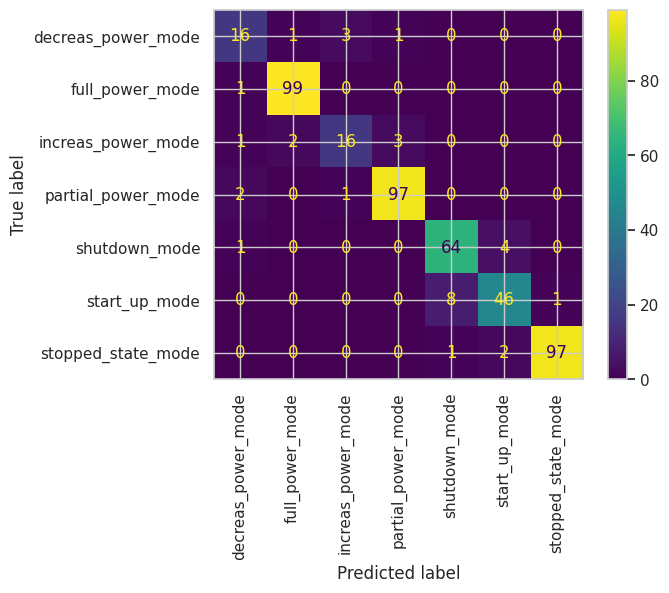

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix

conf_mat = confusion_matrix(y_test_resampled_encoded, y_pred)
ConfusionMatrixDisplay(conf_mat, display_labels=encoder.classes_).plot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(classification_report(y_test_resampled_encoded, y_pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

decreas_power_mode       0.76      0.76      0.76        21
   full_power_mode       0.97      0.99      0.98       100
increas_power_mode       0.80      0.73      0.76        22
partial_power_mode       0.96      0.97      0.97       100
     shutdown_mode       0.89      0.94      0.92        69
     start_up_mode       0.90      0.85      0.88        55
stopped_state_mode       0.99      0.97      0.98       100

          accuracy                           0.94       467
         macro avg       0.90      0.89      0.89       467
      weighted avg       0.94      0.94      0.94       467



RandomizedSearchCV

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

# Создание модели XGB
classifier =  xgb.XGBClassifier(
    objective='multi:softmax', num_class=4, random_state=42)

# Сетка гиперпараметров
param_grid = {
    'max_depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200],
    'subsample': [0.7, 0.8, 1.0],
    'colsample_bytree': [0.7, 0.8, 1.0]
}

# Использование RandomizedSearchCV для подбора параметров
random_search = RandomizedSearchCV(
    estimator=classifier, param_distributions=param_grid, n_iter=10, cv=5,
    n_jobs=-1, verbose=2, random_state=42)

# Обучение модели с RandomizedSearchCV
random_search.fit(X_train_resampled, y_train_resampled_encoded)

# Вывод лучших параметров
print("Лучшие параметры:", random_search.best_params_)



Fitting 5 folds for each of 10 candidates, totalling 50 fits
Лучшие параметры: {'subsample': 0.8, 'n_estimators': 200, 'max_depth': 6, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [ ]:
# Оценка модели на тестовых данных
best_classifier = random_search.best_estimator_
# print("Точность на тестовой выборке:", best_classifier.score(X_test_resampled, y_test_resampled_encoded))
y_pred = best_classifier.predict(X_test_resampled)

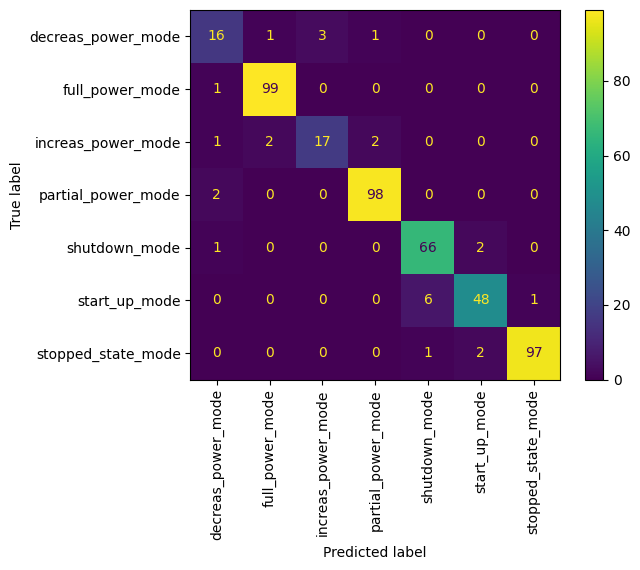

In [ ]:
conf_mat = confusion_matrix(y_test_resampled_encoded, y_pred)
ConfusionMatrixDisplay(conf_mat, display_labels=encoder.classes_).plot()
plt.xticks(rotation=90)
plt.show()

In [ ]:
print(classification_report(y_test_resampled_encoded, y_pred, target_names=encoder.classes_))

                    precision    recall  f1-score   support

decreas_power_mode       0.76      0.76      0.76        21
   full_power_mode       0.97      0.99      0.98       100
increas_power_mode       0.85      0.77      0.81        22
partial_power_mode       0.97      0.98      0.98       100
     shutdown_mode       0.90      0.96      0.93        69
     start_up_mode       0.92      0.87      0.90        55
stopped_state_mode       0.99      0.97      0.98       100

          accuracy                           0.94       467
         macro avg       0.91      0.90      0.90       467
      weighted avg       0.94      0.94      0.94       467



## Прогнозирование с XGBoost

In [ ]:
import gdown
url = "https://drive.google.com/drive/folders/1RtrAevJUYSgTbp0YUztxEBB8_VcvjgGH?usp=drive_link"
gdown.download_folder(url, quiet=True, verify=False)

['/content/option_0/file_0.gzip',
 '/content/option_0/file_1.gzip',
 '/content/option_0/file_2.gzip',
 '/content/option_0/file_3.gzip',
 '/content/option_0/file_4.gzip',
 '/content/option_0/file_5.gzip',
 '/content/option_0/file_6.gzip',
 '/content/option_0/file_7.gzip',
 '/content/option_0/description.json',
 '/content/option_0/scheme.png']

In [ ]:
import glob
parquetFileList = glob.glob(f'./option_0/*.gzip')

In [ ]:
df_list = []

for file in tqdm(parquetFileList):
    df = pd.read_parquet(file)
    df_list.append(df)

data = pd.concat(df_list, axis=0).sort_index().ffill().drop_duplicates()
data = data.dropna()

100%|██████████| 8/8 [00:05<00:00,  1.45it/s]


In [ ]:
data.columns

Index(['GTA1.DBinPU.Aldi', 'GTA1.DBinPU.Alvna', 'GTA1.DBinPU.Alzzo',
       'GTA1.DBinPU.Bo', 'GTA1.DBinPU.DlPkf', 'GTA1.DBinPU.DlPtgft',
       'GTA1.DBinPU.DlPvf', 'GTA1.DBinPU.fi', 'GTA1.DBinPU.hmGTD',
       'GTA1.DBinPU.hmTG', 'GTA1.DBinPU.nst', 'GTA1.DBinPU.ntk',
       'GTA1.DBinPU.P', 'GTA1.DBinPU.P1mvhTG', 'GTA1.DBinPU.Pk',
       'GTA1.DBinPU.Pmvh', 'GTA1.DBinPU.PmvhMOGTD', 'GTA1.DBinPU.PmvhMOTG',
       'GTA1.DBinPU.PmvyhMOGTD', 'GTA1.DBinPU.PmvyhMOTG',
       'GTA1.DBinPU.Prazrjag_navhode', 'GTA1.DBinPU.Ptgpd',
       'GTA1.DBinPU.Ptgvh', 'GTA1.DBinPU.Pvh', 'GTA1.DBinPU.Pvyhlg',
       'GTA1.DBinPU.Qtg', 'GTA1.DBinPU.Tk', 'GTA1.DBinPU.Tn', 'GTA1.DBinPU.Tt',
       'GTA1.DBinPU.Tvh1', 'GTA1.DBinPU.Pzad'],
      dtype='object')

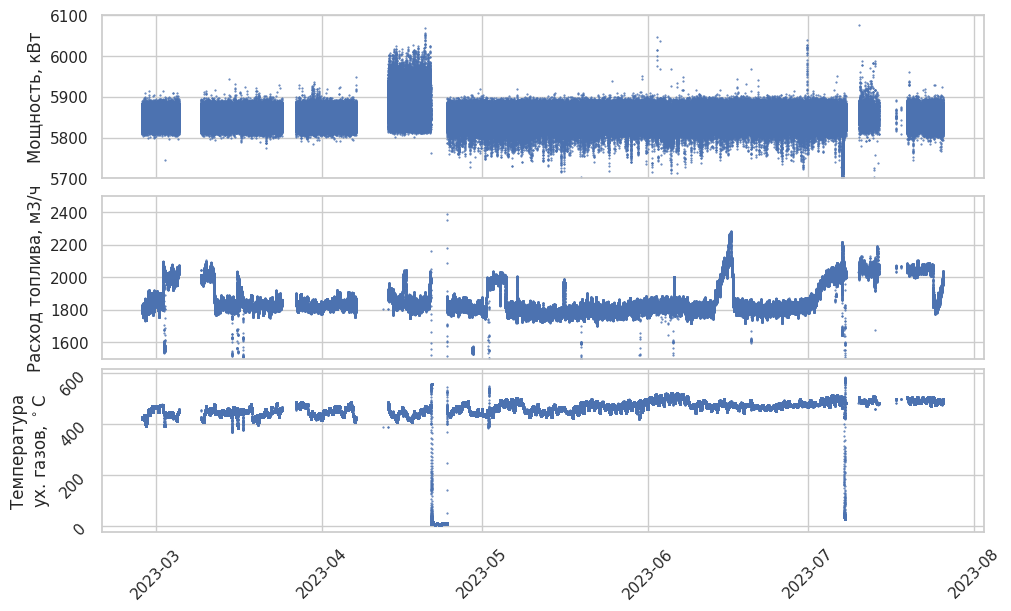

In [ ]:
import seaborn as sns
sns.set_theme(style="whitegrid")

fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(10, 6), constrained_layout=True)

ax1.plot(data['GTA1.DBinPU.P'].index, data['GTA1.DBinPU.P'].values,
         linestyle='none', marker='.', markersize=1);
ax1.set_ylabel("Мощность, кВт");
ax1.set_ylim([5700,6100]);
ax1.tick_params(labelbottom=False)

ax2.plot(data['GTA1.DBinPU.Qtg'].index, data['GTA1.DBinPU.Qtg'].values,
         linestyle='none', marker='.', markersize=1);
ax2.set_ylabel("Расход топлива, м3/ч");
ax2.set_ylim([1500,2500]);
ax2.tick_params(labelbottom=False)

ax3.plot(data['GTA1.DBinPU.Tt'].index, data['GTA1.DBinPU.Tt'].values,
         linestyle='none', marker='.', markersize=1);
ax3.set_ylabel("Температура\nух. газов, $^\\circ$С");
# ax3.set_ylim([300,600]);
ax3.tick_params(rotation=45);

In [ ]:
df = pd.DataFrame(data['GTA1.DBinPU.Tt'])
df = df.resample('1h').mean()
df.columns = ['Tt']
df = df[df['Tt'] > 300]

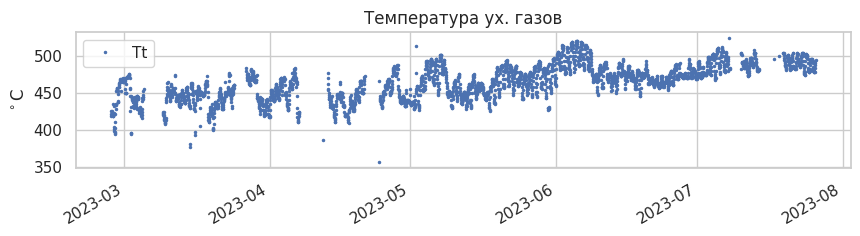

In [ ]:
df.plot(style='.', figsize=(10, 2), ms=3, title="Температура ух. газов")
plt.ylabel("$^\\circ$С")
plt.show()

Функция для генерации лагов

In [ ]:
def create_lag_features(df, column, lags):
    """
    Создает лаги признака column в количестве lags и возвращает новый DataFrame.
    """
    df_lagged = df.copy()
    for lag in range(1, lags + 1):
        df_lagged[f"{column}_lag_{lag}"] = df_lagged[column].shift(lag)

    return df_lagged

In [ ]:
n_lags = 24
df = create_lag_features(df, 'Tt', n_lags)

In [ ]:
df.head()

,Tt,Tt_lag_1,Tt_lag_2,Tt_lag_3,Tt_lag_4,Tt_lag_5,Tt_lag_6,Tt_lag_7,Tt_lag_8,Tt_lag_9,...,Tt_lag_15,Tt_lag_16,Tt_lag_17,Tt_lag_18,Tt_lag_19,Tt_lag_20,Tt_lag_21,Tt_lag_22,Tt_lag_23,Tt_lag_24
2023-02-26 06:00:00,418.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-26 07:00:00,421.854112,418.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-26 08:00:00,425.267525,421.854112,418.800000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-26 09:00:00,425.640959,425.267525,421.854112,418.800000,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2023-02-26 10:00:00,422.100007,425.640959,425.267525,421.854112,418.8,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.dropna(inplace=True)

In [ ]:
y = df.loc[:, ['Tt']]
X = df.loc[:, [col for col in df.columns if 'lag' in col]]

Разделим на тренировочную и тестовую выборки (временной порядок важно сохранить!)

In [ ]:
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

Обучение модели

In [ ]:
pred_model = xgb.XGBRegressor()
pred_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

Предсказание

In [ ]:
y_pred = pred_model.predict(X_test)

In [ ]:
# Оценка
from sklearn.metrics import mean_squared_error

rmse = mean_squared_error(y_test, y_pred)
print("RMSE:", rmse)

RMSE: 14.10351848602295


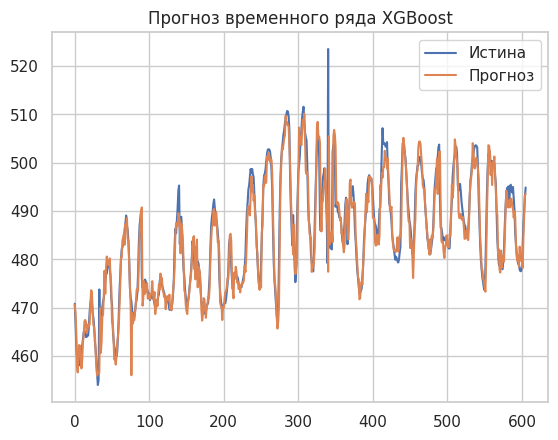

In [ ]:
# Визуализация
plt.plot(y_test.values, label='Истина')
plt.plot(y_pred, label='Прогноз')
plt.legend()
plt.title("Прогноз временного ряда XGBoost")
plt.show()

Автономный autoregressive прогноз, начиная с начала теста

In [ ]:
start = X_test.index[0]
end = X_test.index[-1]
timestamps = pd.date_range(start=start, end=end, freq='1H')

,0
2023-06-23 14:00:00,470.588745
2023-06-23 15:00:00,470.369873
2023-06-23 16:00:00,472.435333
2023-06-23 17:00:00,469.282837
2023-06-23 18:00:00,472.903015
...,...
2023-07-26 02:00:00,451.993347
2023-07-26 03:00:00,444.992615
2023-07-26 04:00:00,406.680817
2023-07-26 05:00:00,448.406281


In [ ]:
predictions = []
lags = X_test.iloc[0].values.tolist()  # первые лаги из начала теста

for _ in timestamps:
    # Прогноз
    y_pred = pred_model.predict(np.array([lags]))[0]
    predictions.append(y_pred)

    # Обновляем лаги: сдвигаем влево и добавляем новый прогноз
    lags = lags[1:] + [y_pred]

predictions = pd.DataFrame(predictions, index=timestamps, columns=['Tt'])

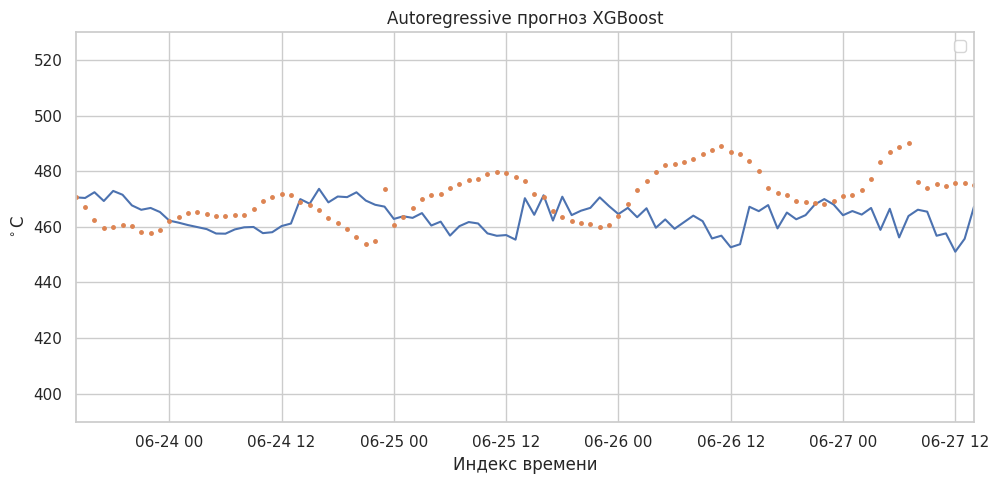

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(predictions.index, predictions['Tt'])
# plt.plot(y_test.index, y_test['Tt'], linestyle='none', marker='.', markersize=5)
plt.plot(df['Tt'].loc[start:].index, df['Tt'].loc[start:], linestyle='none', marker='.', markersize=5)

plt.ylabel("$^\\circ$С")
plt.title('Autoregressive прогноз XGBoost')
plt.xlabel('Индекс времени')
plt.legend()
plt.grid(True)
plt.tight_layout()

plt.xlim([start, start + pd.Timedelta("4d")])

plt.show()

In [ ]:
def make_seq2seq_dataset(series, input_len, output_len):
    X, Y = [], []
    for i in range(len(series) - input_len - output_len + 1):
        X.append(series[i:i + input_len])
        Y.append(series[i + input_len:i + input_len + output_len])
    return np.array(X), np.array(Y)

In [ ]:
input_len = 20
output_len = 20
X, Y = make_seq2seq_dataset(df['Tt'], input_len=input_len, output_len=output_len)

In [ ]:
train_size = int(len(df) * 0.8)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = Y[:train_size], Y[train_size:]

In [ ]:
from sklearn.multioutput import MultiOutputRegressor

model = MultiOutputRegressor(xgb.XGBRegressor())
model.fit(X_train, y_train)  # X_train: (n_samples, 20), y_train: (n_samples, 20)

MultiOutputRegressor(estimator=XGBRegressor(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None,
                                            grow_policy=None,
                                            importance_type=None,
                                            interaction_constraints=None,
                                            learning_rate=None, max_bin=None,
                                            max_cat_threshold=None,
                                            max_cat_to_onehot=None,
                                            max_delta_step=None, max_depth=None,
                                            max_leaves=None,
                                            min_child_weight=None, missing=nan,
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=None, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=None, ...))

In [ ]:
y_pred = model.predict(X_test)

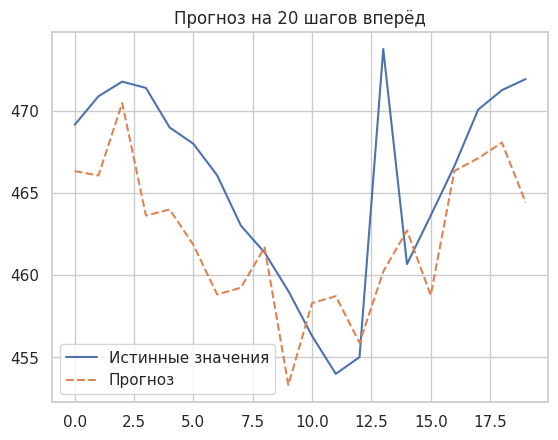

In [ ]:
plt.plot(range(20), y_test[0], label="Истинные значения")
plt.plot(range(20), y_pred[0], label="Прогноз", linestyle="--")
plt.legend()
plt.title("Прогноз на 20 шагов вперёд")
plt.show()

In [ ]:
X_test.shape

(567, 20)

In [ ]:
current_input = X_test[0]
predictions = []

# Сколько раз надо сделать предсказания
n_iters = (len(timestamps) - input_len) // output_len

In [ ]:
for _ in range(n_iters):
    # Предсказание следующих 20 значений
    pred = model.predict(np.array([current_input]))[0]
    predictions.extend(pred)


    # Обновляем вход: последние 20 предсказанных значений
    current_input = pred.tolist()

In [ ]:
predictions = pd.DataFrame(predictions, index=timestamps[input_len:len(predictions)+input_len], columns=['Tt'])

(567, 20)

In [ ]:
start

Timestamp('2023-06-23 14:00:00')

,Tt
2023-06-23 14:00:00,470.814105
2023-06-23 15:00:00,467.026627
2023-06-23 16:00:00,462.463481
2023-06-23 17:00:00,459.628746
2023-06-23 18:00:00,460.107573
...,...
2023-07-26 02:00:00,482.820262
2023-07-26 03:00:00,487.334078
2023-07-26 04:00:00,490.255401
2023-07-26 05:00:00,492.941032


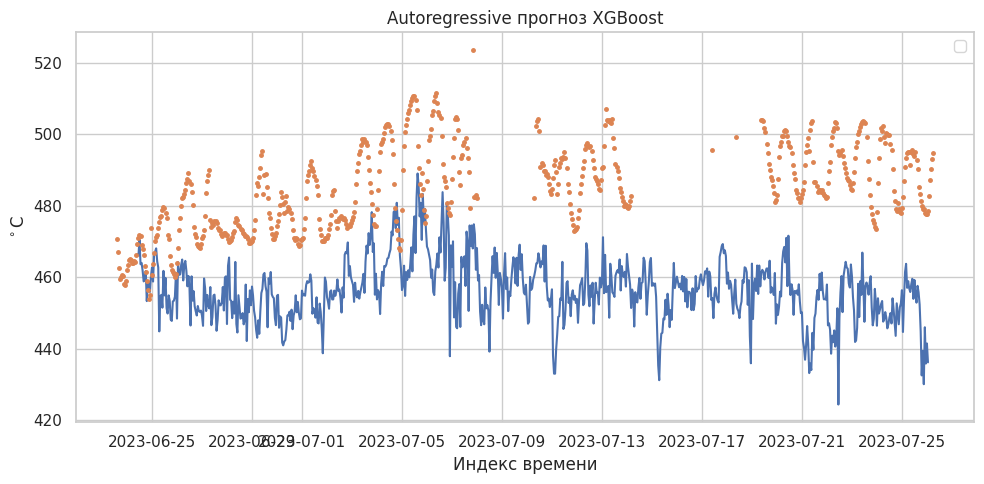

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(predictions.index, predictions['Tt'])
plt.plot(df['Tt'].loc[start:].index, df['Tt'].loc[start:], linestyle='none', marker='.', markersize=5)


plt.ylabel("$^\\circ$С")
plt.title('Autoregressive прогноз XGBoost')
plt.xlabel('Индекс времени')
plt.legend()
plt.grid(True)
plt.tight_layout()

# plt.xlim([start, start + pd.Timedelta("4d")])

plt.show()

In [ ]:
predictions

,Tt
2023-06-24 10:00:00,466.338837
2023-06-24 11:00:00,466.073486
2023-06-24 12:00:00,470.485138
2023-06-24 13:00:00,463.630737
2023-06-24 14:00:00,464.000916
...,...
2023-07-25 21:00:00,430.058716
2023-07-25 22:00:00,445.991180
2023-07-25 23:00:00,435.840851
2023-07-26 00:00:00,441.456696


In [ ]:
len(timestamps) - input_len

765

760